# SEL634 - Laboratório de Robôs Manipuladores

## Inicialização da biblioteca

Carregar a biblioteca de robótica para Python:

In [ ]:
!pip install roboticstoolbox-python
!pip install spatialmath-python

In [ ]:
import numpy as np
#import roboticstoolbox as rtb
from roboticstoolbox import *
from spatialmath import *
from math import pi
import matplotlib.pyplot as plt
from matplotlib import cm
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

# no Binder utilizar essa linha
%matplotlib notebook  
# no Colab utilizar essa linha
#%matplotlib inline

## Tarefa 2 - Cinemática Direta: Kinova Gen3

O robô Kinova Gen3 pode ser representado pelo seguinte diagrama esquemático:

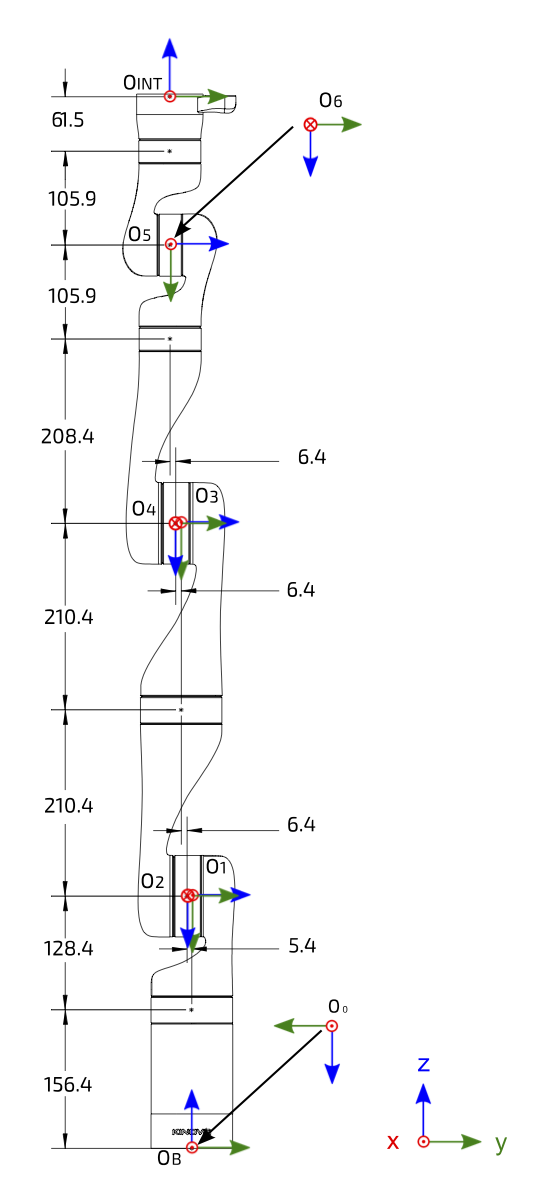

A Tabela de DH do robô Kinova Gen3 é dada por:



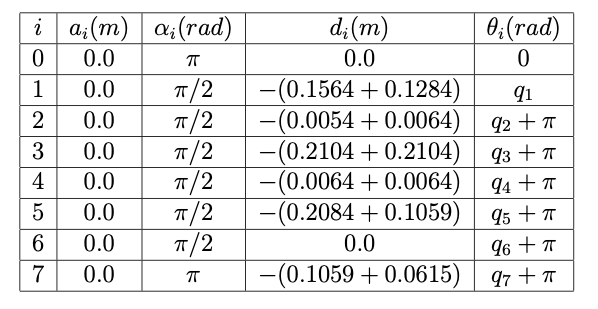

### 2.1 Modelo cinemático do robô 

Observe que na tabela fornecida existe uma linha para $i=0$ que correponde a uma transformação homogênea fixa do sistema de coordenadas $0$ em relaçào ao sistema de coordenadas $B$.

Os parâmetros de DH definem a seguinte matriz de transformação homogênea:

$${^{i-1}H_{i}} = R_z(\theta_i) D_z(d_i) D_x(a_i) R_x(\alpha_i)$$

Portanto, utilizando a biblioteca de robótica e representação espacial para Python, a matriz $^BH_0$ pode ser definida por:

In [ ]:
H_B0 = SE3.Rz(0)*SE3(0,0,0)*SE3(0,0,0)*SE3.Rx(pi)
H_B0

As demais linhas da tabela de DH, da linha $i=1$ até $i=7$, descrevem as relações geométricas para as 7 juntas e elos do robô Kinova Gen3. 

A função `DHRobot` da biblioteca de robótica pode ser usada para modelar o robô:

In [ ]:
def kinova_robot(my_name):
  robot = DHRobot(
      [
       # Colocar seu código aqui para completar a descrição do robô
        RevoluteDH(d=-(0.1564+0.1284), alpha=pi/2),
            RevoluteDH(d=-(0.0054+0.0064), alpha=pi/2, offset=pi),
            RevoluteDH(d=-(0.2104+0.2104), alpha=pi/2, offset=pi),
            RevoluteDH(d=-(0.0064+0.0064), alpha=pi/2, offset=pi),
            RevoluteDH(d=-(0.2084+0.1059), alpha=pi/2, offset=pi),
            RevoluteDH(alpha=pi/2, offset=pi),
            RevoluteDH(d=-(0.1059+0.0615), alpha=pi, offset=pi)
       ], name=my_name)
  H_B0 = SE3.Rz(0)*SE3(0,0,0)*SE3(0,0,0)*SE3.Rx(pi)
  robot.base = H_B0
  return robot

robot1 = kinova_robot("KinovaGen3_P1")
print(robot1)

### 2.2 Plotar o robô na posição inicial

Para mostrar o robô na posição inicial:

In [ ]:
q1 = [0,0,0,0,0,0,0]
robot1.plot(q1)

### 2.3 Plotar robô em uma outra posição

Para mostrar uma nova figura em uma posição diferente, é necessário definir um robô igual mas com outro nome, e então plotar o robô em uma posição desejada:

In [ ]:
robot2 = kinova_robot("KinovaGen3_P2")
# Alterar a posição a seguir:
q2 = [0,pi/2,0,0,0,0,0] 
robot2.plot(q1)

### 2.4 Pose do efetuador em relação a base

Para retornar a matriz de transformação homogênea que descreve a pose do efetuador do robô em relação ao sistema de coordenadas da base, $B$, é preciso compor:

$${^BH_7} = {^BH_0} {^0H_7}$$

Portanto, pode-se definir a seguinte função que retorna $^BH_0$ para uma configuração $\mathbf{q}$ do robô: 

In [ ]:
def pose_efetuador(robot, q):
  H_B7 = robot.fkine(q)
  return H_B7

Então, por exemplo, utilizando a função definida para a configuração inicial:

In [ ]:
q1 = [0,0,0,0,0,0,0]
H = pose_efetuador(robot1,q1)
H

Para a configuração $\mathbf{q} = [0, \pi/2, 0, -\pi/2, 0, -\pi/2, 0]^T$ a pose do efetuador em relação ao sistema da base $B$ fica:

In [ ]:
# Colocar seu código aqui

### 2.5 Trabalhando com múltiplas configurações do robô

Suponha agora que você queira resolver a cinemática direta para uma sequência de configurações para o robô. Essa sequência pode ser usada para definir, por exemplo, uma trajetória no espaço das juntas do robô.

A configuração do robô está sendo representada por uma lista de $\mathbf{q}$ de dimensão $N$ para um robô manipulador de $N$ juntas. Uma matriz $\mathbf{Q}$ de dimensão $M \times N$ pode ser usada para representar a sequência de $M$ configurações para robô. 

Para a sequencia de duas configurações, $[0,0,0,0,0,0,0]$ e $[0,\pi/2,0,0,0,0,0]$, o seguinte código pode ser usado para encontrar uma lista de matrizes de transformações homogêneas que representam a pose do efetuar do robô em relação a sua base para cada uma das configurações:

In [ ]:
Q = np.array([[0,0,0,0,0,0,0],
     [0,pi/2,0,-pi/2,0,-pi/2,0]])
print("Q = ",Q)

In [ ]:
H = pose_efetuador(robot1,Q) # H é uma lista de M matrizes de transf homogenia 4x4, ou seja, M objetos da classe SE3
print("Lista H contendo M objetos da classe SE3:\n",H)

Cada elemento da lista resultante é um objeto da classe SE3 que representa uma pose do efetuador em relação a base do robô. Cada um dos elementos pode ser acessado por seu indice. Também é possível acessar a matriz de rotação, o vetor de translação, e manipular a matriz de transformação homogênia como um `np.array`:

In [ ]:
# Para acessar cada matriz de transformação homogênea (cada objeto da classe SE3):
print("H[0] = ",H[0])
print("H[1] = ",H[1])

# Para acessar o vetor de translação da primeira pose do efetuador:
print("d[0] =",H[0].t)
# Para acessar a matriz de rotação da primeira pose do efetuador:
print("R[0] =",H[0].R)
# Para acessar a matriz de transformação homogênea no formato np.array:
print("H[0] =",H[0].A)
# Para acessar a matriz de rotação e o vetor de translação a partir da matriz de transformação homogênea no formato np.array:
H0 = H[0].A
print("R[0] =",H0[0:3,0:3]) # seleciona as três primeiras linhas (que possuem indices 0, 1 e 2) e as três primeiras colunas (que possuem indices 0, 1 e 2)
print("d[0] = ", H0[0:3,3]) # seleciona as três primeiras linhas da quarta coluna da matriz 

Para transformar a lista de objetos da classe SE3 em uma matriz de $M$ matrizes $4 \times 4$ do tipo `np.array`:

In [ ]:
HH = np.array(H[:].A) # Transformar a lista em matriz de M de transf homogenia Matrizes 4x4
X = HH[:,0,3] # Acessar a coordenada x do efetuador para todos os M pontos da trajetória
print("X = ", X)
Y = HH[:,1,3] # Acessar a coordenada y do efetuador para todos os M pontos da trajetória
print("Y = ", Y)
Z = HH[:,2,3] # Acessar a coordenada z do efetuador para todos os M pontos da trajetória
print("Z = ", Z)
P = HH[:,0:3,3] # Acessar o vetor de posição do efetuador (3x1) para todos os M pontos da trajetória (P tem dimensão Mx3)
print("P = ",P) # Retorna matriz Mx3
print("P.T = ", P.T) # Retorna matriz 3xM
